<a href="https://colab.research.google.com/github/orozcohsu/ntunhs_2020/blob/master/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* import keras, matplotlib, numpy
* download pre-trained vgg16 model
* use testing image
* image classification



In [0]:
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input ,decode_predictions

import numpy as np

In [0]:
def percent(value):
  return '%.2f%%' % (value*100)

In [0]:
model=VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 7s 0us/step


In [0]:
#read iamge for your google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img_path_frog='/content/drive/My Drive/dataset/images/frog.jpg'
img_path_tiger='/content/drive/My Drive/dataset/images/tiger.jpg'
img_frog = image.load_img(img_path_frog, target_size=(224,224))
img_tiger = image.load_img(img_path_tiger, target_size=(224,224))

In [0]:
#convert image to float
x=image.img_to_array(img_frog)
#convert tensor size (1, 224, 224, 3)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [0]:
#get prediction features (dim: 1,1000)
features=model.predict(x)
#get top 5 most likely class and its probability
pred=decode_predictions(features,top=5)[0]

40960/35363 [==================================] - 0s 0us/step


In [0]:
#collect all pred value
values=[]
bar_label=[]
for element in pred:
  values.append(element[2])
  bar_label.append(element[1])

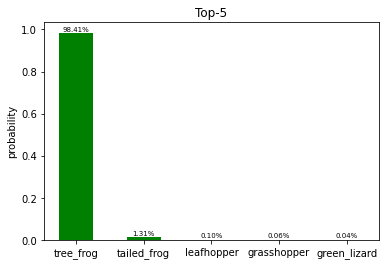

In [0]:
fig=plt.figure(u"Top-5 prediction")
ax=fig.add_subplot(111)
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u"probability")
ax.set_title(u"Top-5")
for a,b in zip(range(len(values)),values):
  ax.text(a,b+0.005,percent(b),ha='center',va='bottom',fontsize=7)

fig=plt.gcf()
plt.show()

In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     